In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("~/projects/us-education-datasets-unification-project/data/us-education-datasets-unification-project/states_all.csv")
df_orig = df.copy()

In [4]:
df.shape

(1492, 25)

In [5]:
print('THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED')
print('There are: ')
print(df['PRIMARY_KEY'].duplicated(keep=False).sum(), 'duplicated PRIMARY_KEY s')
print('Unique duplicated keys: \n', df[df['PRIMARY_KEY'].duplicated(keep=False)]['PRIMARY_KEY'].unique())
df[df['PRIMARY_KEY'].duplicated(keep=False)]

THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED
There are: 
9 duplicated PRIMARY_KEY s
Unique duplicated keys: 
 ['2008_DISTRICT_OF_COLUMBIA' '2008_VIRGINIA' '2009_DISTRICT_OF_COLUMBIA'
 '2010_DISTRICT_OF_COLUMBIA']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
824,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,0.0,1138744.0,1224785.0,520090.0,...,3292.0,2936.0,2092.0,26249.0,10315.0,36676.0,NaN,NaN,NaN,NaN
825,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,0.0,1138744.0,1224785.0,520090.0,...,4595.0,4540.0,3444.0,38190.0,17891.0,63532.0,NaN,NaN,NaN,NaN
863,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,4666.0,3863.0,2535.0,36807.0,12837.0,51345.0,NaN,NaN,NaN,NaN
864,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,2548.0,1485.0,484.0,19226.0,2758.0,24554.0,NaN,NaN,NaN,NaN
865,2008_VIRGINIA,VIRGINIA,2008,1230857.0,14768120.0,897627.0,5957786.0,7912707.0,15236306.0,8003167.0,...,91133.0,92881.0,87177.0,735090.0,380787.0,1145864.0,NaN,NaN,NaN,NaN
878,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,4893.0,4452.0,3301.0,37698.0,17597.0,63794.0,219.260141,253.595187,201.984638,252.631381
879,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,3423.0,2860.0,2188.0,26762.0,9970.0,36823.0,219.260141,253.595187,201.984638,252.631381
930,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,3397.0,2992.0,2203.0,27264.0,9977.0,NaN,NaN,NaN,NaN,NaN
931,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,4877.0,4307.0,3407.0,37867.0,17632.0,65080.0,NaN,NaN,NaN,NaN


In [6]:
df['avg_total_revenue']=df['TOTAL_REVENUE']/df['GRADES_ALL_G']

df['fracn_schoolage'] = df['GRADES_ALL_G']/df['ENROLL']
df['rev_per_person'] = df['TOTAL_REVENUE'] / df['ENROLL']
df['exp_per_rev'] = df['TOTAL_EXPENDITURE'] / df['TOTAL_REVENUE']


In [7]:
df['avg_total_expenditure'] = df['TOTAL_EXPENDITURE'] / df['GRADES_ALL_G']
print('2 rows have unreasonably high avg_total_expenditure')
df[df['avg_total_expenditure'] > 100]
drop_rows= df[df['avg_total_expenditure'] > 100].index.to_list()
print(drop_rows)

2 rows have unreasonably high avg_total_expenditure
[863, 864]


/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/daviderickson/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


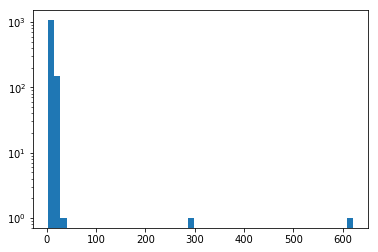

Before drop: (1492, 30)
After drop: (1490, 30)


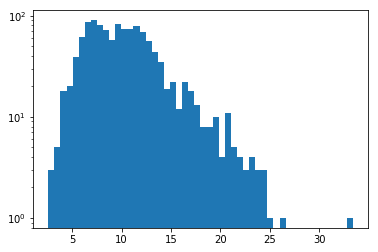

THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED
There are: 
6 duplicated PRIMARY_KEY s
Unique duplicated keys: 
 ['2008_DISTRICT_OF_COLUMBIA' '2009_DISTRICT_OF_COLUMBIA'
 '2010_DISTRICT_OF_COLUMBIA']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure
824,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,0.0,1138744.0,1224785.0,520090.0,...,36676.0,NaN,NaN,NaN,NaN,33.381830,0.630269,21.039542,1.000386,33.394727
825,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,0.0,1138744.0,1224785.0,520090.0,...,63532.0,NaN,NaN,NaN,NaN,19.270793,1.091784,21.039542,1.000386,19.278238
878,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,63794.0,219.260141,253.595187,201.984638,252.631381,12.556165,1.439038,18.068801,1.005436,12.624416
879,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,36823.0,219.260141,253.595187,201.984638,252.631381,21.752926,0.830638,18.068801,1.005436,21.871167
930,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.263347,1.078695,NaN
931,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,65080.0,NaN,NaN,NaN,NaN,18.376368,1.483609,27.263347,1.078695,19.822495


In [8]:
plt.hist('avg_total_expenditure', bins=50, log=True, data=df);
plt.show()


# Drop the 2 outlier rows
print('Before drop:', df.shape)
df.drop(axis=0, labels= drop_rows, inplace=True)
print('After drop:', df.shape)

plt.hist('avg_total_expenditure', bins=50, log=True, data=df);
plt.show()

print('THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED')
print('There are: ')
print(df['PRIMARY_KEY'].duplicated(keep=False).sum(), 'duplicated PRIMARY_KEY s')
print('Unique duplicated keys: \n', df[df['PRIMARY_KEY'].duplicated(keep=False)]['PRIMARY_KEY'].unique())
df[df['PRIMARY_KEY'].duplicated(keep=False)]

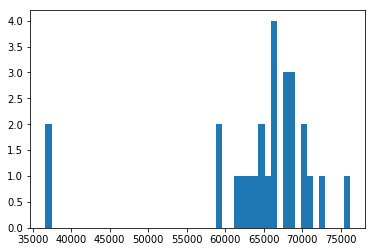

2 rows in DISTRICT_OF_COLUMBIAs data have unreasonably small GRADES_ALL_G


In [9]:
hist_df = df[df['STATE']=='DISTRICT_OF_COLUMBIA']
plt.hist('GRADES_ALL_G', data=hist_df, log=False, bins=50);
plt.show()

print('2 rows in DISTRICT_OF_COLUMBIAs data have unreasonably small GRADES_ALL_G')

In [10]:
print('These DISTRICT_OF_COLUMBIA duplicated keys have unreasonably small GRADES_ALL_G')
print(df[ (df['STATE'] == 'DISTRICT_OF_COLUMBIA') & (df['GRADES_ALL_G'] <  40000)]['GRADES_ALL_G'])
df[ (df['STATE'] == 'DISTRICT_OF_COLUMBIA') & (df['GRADES_ALL_G'] <  40000)]

These DISTRICT_OF_COLUMBIA duplicated keys have unreasonably small GRADES_ALL_G
824    36676.0
879    36823.0
Name: GRADES_ALL_G, dtype: float64


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure
824,2008_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2008,58191.0,1224312.0,85568.0,0.0,1138744.0,1224785.0,520090.0,...,36676.0,NaN,NaN,NaN,NaN,33.381830,0.630269,21.039542,1.000386,33.394727
879,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2009,44331.0,801008.0,75856.0,0.0,725152.0,805362.0,330698.0,...,36823.0,219.260141,253.595187,201.984638,252.631381,21.752926,0.830638,18.068801,1.005436,21.871167


In [11]:
print('Drop these bad rows.')
print('Before drop df.shape=', df.shape)

drop_index= df[(df['STATE'] == 'DISTRICT_OF_COLUMBIA') & (df['GRADES_ALL_G'] <  40000)].index.to_list()
print(drop_index)

df.drop(axis=0, labels= drop_index, inplace=True)
print('After drop df.shape=', df.shape)

Drop these bad rows.
Before drop df.shape= (1490, 30)
[824, 879]
After drop df.shape= (1488, 30)


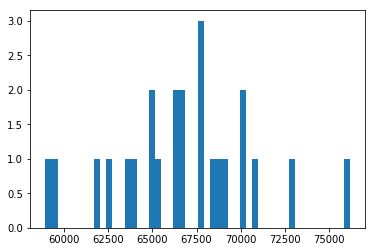

REMOVED: 2 rows in DISTRICT_OF_COLUMBIAs data HAD unreasonably small GRADES_ALL_G


In [12]:
hist_df = df[df['STATE']=='DISTRICT_OF_COLUMBIA']
plt.hist('GRADES_ALL_G', data=hist_df, log=False, bins=50);
plt.show()

print('REMOVED: 2 rows in DISTRICT_OF_COLUMBIAs data HAD unreasonably small GRADES_ALL_G')

In [13]:
print(df.shape, df_orig.shape)

(1488, 30) (1492, 25)


In [14]:
print('THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED')
print('There are: ')
print(df['PRIMARY_KEY'].duplicated(keep=False).sum(), 'duplicated PRIMARY_KEY s')
print('Unique duplicated keys: \n', df[df['PRIMARY_KEY'].duplicated(keep=False)]['PRIMARY_KEY'].unique())
df[df['PRIMARY_KEY'].duplicated(keep=False)]

THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED
There are: 
2 duplicated PRIMARY_KEY s
Unique duplicated keys: 
 ['2010_DISTRICT_OF_COLUMBIA']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure
930,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.263347,1.078695,NaN
931,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,65080.0,NaN,NaN,NaN,NaN,18.376368,1.483609,27.263347,1.078695,19.822495


In [26]:
print('The rows are identical except that one has NaN s in place of entries in some columns')
print('Drop the row with more NaN s')

drop_rows= df[(df['PRIMARY_KEY'] == '2010_DISTRICT_OF_COLUMBIA') & (df['GRADES_ALL_G'].isnull()) ].index.to_list()

df[(df['PRIMARY_KEY'] == '2010_DISTRICT_OF_COLUMBIA') & (df['GRADES_ALL_G'].isnull()) ]

The rows are identical except that one has NaN s in place of entries in some columns
Drop the row with more NaN s


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure
930,2010_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2010,43866.0,1195934.0,80585.0,0.0,1115349.0,1290048.0,526469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.263347,1.078695,NaN


In [28]:

print('Shape before: ', df.shape)
df.drop(axis=0, labels=drop_rows, inplace=True)
print('Shape after: ', df.shape)


Shape before:  (1488, 30)
Shape after:  (1487, 30)


In [29]:
print('THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED')
print('There are: ')
print(df['PRIMARY_KEY'].duplicated(keep=False).sum(), 'duplicated PRIMARY_KEY s')
print('Unique duplicated keys: \n', df[df['PRIMARY_KEY'].duplicated(keep=False)]['PRIMARY_KEY'].unique())
df[df['PRIMARY_KEY'].duplicated(keep=False)]

THERE ARE OUTLIERS PRESENT THAT NEED TO BE REMOVED
There are: 
0 duplicated PRIMARY_KEY s
Unique duplicated keys: 
 []


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure


In [30]:
print(len(df_orig) - len(df), ' rows removed')

5  rows removed


In [31]:
df.to_csv("~/projects/us-education-datasets-unification-project/data/us-education-datasets-unification-project/states_all-cleaned.csv")

In [32]:
kill

NameError: name 'kill' is not defined

In [33]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure
count,1487.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1.315000e+03,535.000000,531.000000,532.000000,497.000000,1214.000000,1164.000000,1224.000000,1275.000000,1214.000000
mean,2004.419637,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,8.047688e+05,234.797280,278.461453,218.897886,263.683325,10.372979,0.947725,10.187222,1.006783,10.421263
std,7.402309,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,9.712596e+05,10.209002,10.111886,7.742281,6.792513,4.011296,0.076139,4.102953,0.043217,3.974681
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,7.254000e+03,187.134670,232.831510,178.557612,236.379102,2.576621,0.800923,3.543637,0.717038,2.563009
25%,1998.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,1.837415e+05,229.752478,272.765806,214.741150,259.547225,7.358710,0.923023,7.216431,0.984478,7.389888
50%,2004.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,5.547770e+05,237.264821,280.619538,220.442392,265.022859,9.840336,0.935386,9.381723,1.006411,9.884785
75%,2011.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,9.298230e+05,242.000056,285.411348,224.005309,268.197443,12.437640,0.950958,12.048990,1.029446,12.438096
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,5.944746e+06,253.420961,300.568235,236.773867,280.499130,25.775146,1.782240,29.948695,1.185742,26.334393


In [34]:
#sns.pairplot(df, kind='scatter')

In [35]:
# KMeans Clustering

from sklearn.cluster import KMeans
# df.drop(['AVG_MATH_4_SCORE'], axis=1)
print(df.shape)
print(df.dropna(axis=0).shape)

df1 = df.dropna(axis=0)
df1 = pd.get_dummies(df1, columns=['STATE'])
drop_cols = ['PRIMARY_KEY', 'YEAR', 'ENROLL', \
             'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', \
             'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', \
             'CAPITAL_OUTLAY_EXPENDITURE', \
             'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', \
             'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
df1 = df1.drop(drop_cols, axis=1)

kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(df1)

(1487, 30)
(412, 30)


In [36]:
print(df1.columns)

Index(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_READING_8_SCORE', 'avg_total_revenue', 'fracn_schoolage',
       'rev_per_person', 'exp_per_rev', 'avg_total_expenditure',
       'STATE_ALABAMA', 'STATE_ALASKA', 'STATE_ARIZONA', 'STATE_ARKANSAS',
       'STATE_CALIFORNIA', 'STATE_COLORADO', 'STATE_CONNECTICUT',
       'STATE_DELAWARE', 'STATE_DISTRICT_OF_COLUMBIA', 'STATE_FLORIDA',
       'STATE_GEORGIA', 'STATE_HAWAII', 'STATE_IDAHO', 'STATE_ILLINOIS',
       'STATE_INDIANA', 'STATE_IOWA', 'STATE_KANSAS', 'STATE_KENTUCKY',
       'STATE_LOUISIANA', 'STATE_MAINE', 'STATE_MARYLAND',
       'STATE_MASSACHUSETTS', 'STATE_MICHIGAN', 'STATE_MINNESOTA',
       'STATE_MISSISSIPPI', 'STATE_MISSOURI', 'STATE_MONTANA',
       'STATE_NEBRASKA', 'STATE_NEVADA', 'STATE_NEW_HAMPSHIRE',
       'STATE_NEW_JERSEY', 'STATE_NEW_MEXICO', 'STATE_NEW_YORK',
       'STATE_NORTH_CAROLINA', 'STATE_NORTH_DAKOTA', 'STATE_OHIO',
       'STATE_OKLAHOMA', 'STATE_OREGON', 'STATE_PENN

In [37]:
kmeans.cluster_centers_
centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df1.columns)
centers.sort_values('AVG_MATH_4_SCORE')

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure,STATE_ALABAMA,...,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
6,199.116648,238.883932,187.826724,257.159434,14.575197,0.934747,13.817833,0.995348,14.448715,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,217.505080,262.284830,207.010183,265.221613,6.870821,0.927451,6.372699,1.011570,6.936533,1.739130e-01,...,3.469447e-18,8.695652e-02,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18
9,222.928420,258.115990,203.523572,263.660283,17.071554,1.476560,25.328053,1.000123,17.072228,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,227.875983,270.858090,214.304785,254.298620,9.035291,0.930753,8.404800,0.998582,8.980398,3.448276e-02,...,3.469447e-18,3.448276e-02,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,3.469447e-18,6.896552e-02,3.469447e-18,3.469447e-18
1,231.554774,272.299939,213.431462,267.051687,10.274771,0.941893,9.661130,1.010686,10.322534,5.970149e-02,...,-6.938894e-18,5.970149e-02,4.477612e-02,1.492537e-02,3.469447e-18,1.492537e-02,1.492537e-02,8.955224e-02,3.469447e-18,-6.938894e-18
2,238.225010,281.707037,221.033963,267.136180,10.191969,0.945462,9.628772,1.014964,10.342628,-3.122502e-17,...,3.960396e-02,1.980198e-02,3.960396e-02,5.940594e-02,9.900990e-03,1.980198e-02,1.980198e-02,3.469447e-18,1.980198e-02,-4.163336e-17
8,238.698684,281.447982,221.416243,252.154506,11.125984,0.945061,10.520667,1.003469,11.160074,6.938894e-18,...,3.469447e-18,6.938894e-18,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,2.325581e-02,3.469447e-18,2.325581e-02,2.325581e-02
5,239.779598,282.433747,221.499558,265.103145,18.646159,0.942420,17.559015,0.998589,18.644599,6.938894e-18,...,3.469447e-18,6.938894e-18,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,9.090909e-02
3,244.040658,287.968050,224.397633,264.425753,12.959838,0.943558,12.228306,0.998876,12.940046,-3.469447e-17,...,3.947368e-02,-3.469447e-17,2.631579e-02,1.315789e-02,1.315789e-02,7.894737e-02,5.263158e-02,3.469447e-18,6.578947e-02,1.315789e-02
0,248.101612,292.331390,229.881575,265.138051,18.798079,0.950131,17.834000,0.991012,18.621978,6.938894e-18,...,3.469447e-18,6.938894e-18,6.938894e-18,3.469447e-18,1.935484e-01,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,6.451613e-02


In [38]:
centers['AVG_MATH_4_SCORE']

0    248.101612
1    231.554774
2    238.225010
3    244.040658
4    217.505080
5    239.779598
6    199.116648
7    227.875983
8    238.698684
9    222.928420
Name: AVG_MATH_4_SCORE, dtype: float64

In [39]:
centers.describe()

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,avg_total_revenue,fracn_schoolage,rev_per_person,exp_per_rev,avg_total_expenditure,STATE_ALABAMA,...,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,230.782647,272.833099,214.432570,262.134927,12.954966,0.993804,13.135528,1.002322,12.946973,2.680973e-02,...,7.907764e-03,2.009428e-02,1.106959e-02,8.748921e-03,2.166073e-02,1.136747e-02,1.106147e-02,1.585178e-02,1.088473e-02,1.918389e-02
std,14.622973,16.120986,12.307424,5.476114,4.171951,0.169771,5.685372,0.007730,4.118576,5.558923e-02,...,1.667106e-02,3.103597e-02,1.838036e-02,1.873656e-02,6.058994e-02,2.484480e-02,1.732769e-02,3.376892e-02,2.128232e-02,3.242177e-02
min,199.116648,238.883932,187.826724,252.154506,6.870821,0.927451,6.372699,0.991012,6.936533,-3.469447e-17,...,-6.938894e-18,-3.469447e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.163336e-17
25%,224.165311,264.428145,208.615503,258.784646,10.212669,0.936534,9.636862,0.998584,10.327557,0.000000e+00,...,8.673617e-19,1.734723e-18,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,0.000000e+00
50%,234.889892,276.873960,217.669374,264.764449,12.042911,0.942989,11.374486,0.999500,12.050060,6.938894e-18,...,3.469447e-18,6.938894e-18,6.938894e-18,3.469447e-18,3.469447e-18,6.938894e-18,3.469447e-18,3.469447e-18,3.469447e-18,3.469447e-18
75%,239.509370,282.252070,221.478729,265.200723,16.447465,0.945362,16.623720,1.008882,16.416350,2.586207e-02,...,3.469447e-18,3.081256e-02,1.973684e-02,9.868421e-03,7.425743e-03,1.119403e-02,1.858283e-02,3.469447e-18,1.485149e-02,2.073133e-02
max,248.101612,292.331390,229.881575,267.136180,18.798079,1.476560,25.328053,1.014964,18.644599,1.739130e-01,...,3.960396e-02,8.695652e-02,4.477612e-02,5.940594e-02,1.935484e-01,7.894737e-02,5.263158e-02,8.955224e-02,6.578947e-02,9.090909e-02


In [40]:
print(y_pred)

[4 4 4 4 1 2 6 4 4 2 7 4 8 7 8 2 4 1 4 1 1 1 2 4 4 4 4 2 6 7 4 7 2 8 1 4 8
 7 2 2 1 2 7 4 4 8 2 2 1 7 7 4 1 1 2 2 7 4 1 1 1 7 2 3 8 6 7 7 7 2 1 2 8 2
 7 7 8 2 3 2 3 4 2 8 2 7 3 5 4 8 2 2 2 7 2 2 7 1 2 1 1 2 3 2 2 7 2 8 4 1 1
 7 1 2 8 8 6 8 7 1 2 1 8 2 8 7 7 2 2 0 2 3 4 8 2 2 1 3 5 7 5 2 3 8 1 2 8 1
 8 2 1 2 2 0 3 8 1 8 3 1 5 7 1 1 8 5 8 9 8 1 1 2 8 2 3 3 8 1 3 3 0 2 3 7 2
 3 2 1 3 0 1 5 2 3 3 1 8 3 5 2 3 7 2 2 0 3 2 1 3 5 1 5 1 2 7 3 0 3 9 2 2 1
 8 2 3 3 3 2 1 3 3 0 2 3 1 3 3 3 1 0 0 1 5 8 3 3 8 2 3 5 2 3 1 2 2 0 3 3 1
 3 5 7 5 1 8 1 3 5 8 9 2 2 8 2 5 3 8 3 2 1 3 0 0 8 3 1 2 3 2 8 0 0 1 5 2 3
 3 2 2 0 5 2 3 1 3 2 0 3 3 1 3 5 1 5 8 2 1 3 0 5 9 2 8 2 2 5 3 3 3 2 1 3 0
 0 2 0 1 2 3 8 1 0 0 1 5 2 3 3 2 2 0 5 2 2 2 3 2 0 3 3 1 3 0 1 5 2 1 3 5 5
 9 8 2 5 2 5 3 3 2 2 1 5 5 0 2 0 1 2 8 3 1 0 0 1 5 8 3 3 2 5 5 2 2 2 2 3 0
 3 3 1 3 0]


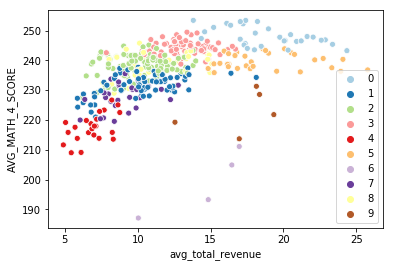

In [ ]:
sns.scatterplot('avg_total_revenue', 'AVG_MATH_4_SCORE' , hue=y_pred.astype(np.int), data=df1, \
                legend='full', palette="Paired")

In [ ]:
# Affinity Propagation Clustering

from sklearn.cluster import AffinityPropagation
# df.drop(['AVG_MATH_4_SCORE'], axis=1)
print(df.shape)
print(df.dropna(axis=0).shape)

df1 = df.dropna(axis=0)
df1 = pd.get_dummies(df1, columns=['STATE'])
drop_cols = ['PRIMARY_KEY', 'YEAR', 'ENROLL', \
             'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', \
             'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', \
             'CAPITAL_OUTLAY_EXPENDITURE', \
             'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', \
             'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
df1 = df1.drop(drop_cols, axis=1)

aff_prop = AffinityPropagation()
y_aff_prop = aff_prop.fit_predict(df1)

(1487, 30)
(412, 30)


In [ ]:
aff_prop.cluster_centers_
centers = pd.DataFrame(data=aff_prop.cluster_centers_, columns=df1.columns)
# centers.sort_values('AVG_MATH_4_SCORE')

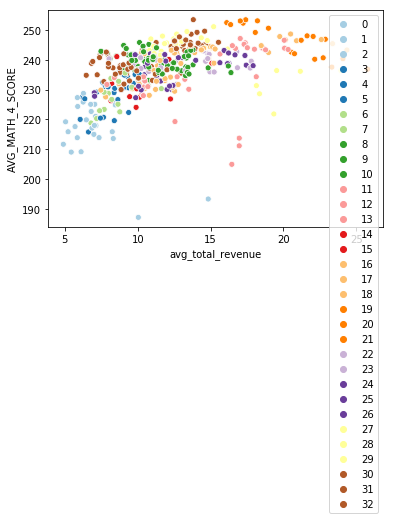

In [ ]:
sns.scatterplot('avg_total_revenue', 'AVG_MATH_4_SCORE' , hue=y_aff_prop.astype(np.int), data=df1, \
                legend='full', palette="Paired")

In [ ]:
# PCA

from sklearn.decomposition import PCA
pca = PCA()
print(pca)

print(df.shape)
print(df.dropna(axis=0).shape)

df1 = df.dropna(axis=0)
df1 = pd.get_dummies(df1, columns=['STATE'])
drop_cols = ['PRIMARY_KEY', 'YEAR', 'ENROLL', \
             'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', \
             'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', \
             'CAPITAL_OUTLAY_EXPENDITURE', \
             'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', \
             'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
df1 = df1.drop(drop_cols, axis=1)
df1 = df1.drop('AVG_MATH_4_SCORE', axis=1)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
(1487, 30)
(412, 30)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Explained Variance')

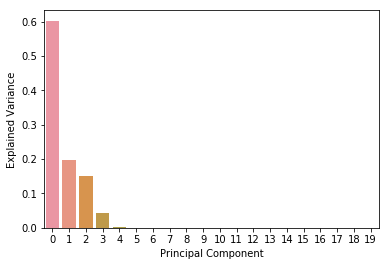

In [ ]:
ax = sns.barplot(x=np.arange(20), y=pca.explained_variance_[0:20]/sum(pca.explained_variance_[0:20]))
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')

In [ ]:
X_pca = pca.fit(df1).transform(df1)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.scatterplot(X_pca[:,0], X_pca[:,1])
plt.subplot(2,2,2)
sns.scatterplot(X_pca[:,2], X_pca[:,3])
plt.subplot(2,2,3)
sns.scatterplot(X_pca[:,4], X_pca[:,5])
plt.subplot(2,2,4)
sns.scatterplot(X_pca[:,6], X_pca[:,7])

In [ ]:
"""g = sns.FacetGrid(df, row="STATE") 
g.map(plt.scatter, 'YEAR', 'AVG_MATH_4_SCORE')"""

In [ ]:
df['AVG_MATH_4_SCORE'].dropna().hist(density=True, cumulative=True)
plt.show()
df['AVG_MATH_4_SCORE'].dropna().hist()

In [ ]:
sns.jointplot("YEAR", "AVG_MATH_4_SCORE", data=df, kind="reg")
sns.jointplot("YEAR", "AVG_READING_4_SCORE", data=df, kind="reg")

In [ ]:
sns.jointplot("avg_total_revenue", "AVG_READING_4_SCORE", data=df, kind="reg")

In [ ]:
sns.jointplot("avg_total_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")

In [ ]:
sns.jointplot("AVG_READING_4_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

In [ ]:
sns.jointplot("AVG_MATH_8_SCORE", "AVG_MATH_4_SCORE", data=df, kind="reg")

In [ ]:
df1=df.drop(['PRIMARY_KEY','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','ENROLL'],axis=1)
df1 = df1.dropna()
print(df1.columns)
df1 = pd.get_dummies(df1, columns=['STATE'])

y=df1.loc[:,'AVG_MATH_4_SCORE'].values
X=df1.drop(['AVG_MATH_4_SCORE'],axis=1).loc[:,:].values
X_cols=df1.drop(['AVG_MATH_4_SCORE'],axis=1).columns

ts_cv = TimeSeriesSplit(n_splits=5)
print(ts_cv)
for train_index, test_index in ts_cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

"""
PredefinedSplit won't work because it folds in future data

test_fold = df1.loc[:,'YEAR'].values
ps = PredefinedSplit(test_fold)
print(ps.get_n_splits())
for train_index, test_index in ps.split():
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
"""

In [ ]:
n_splits=20
ts_cv = TimeSeriesSplit(n_splits=n_splits)
rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)

index=0
train_score = np.zeros(n_splits)
test_score = np.zeros(n_splits)

for train_index, test_index in ts_cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]   
    
    rf_model.fit(X_train, y_train) 
    Y_rf=rf_model.predict(X_test)
    train_score[index]=rf_model.score(X_train,y_train) #Train score
    test_score[index]=rf_model.score(X_test,y_test) #Test score
    index+=1
index_list=np.arange(index)

In [ ]:
print(index)
print(index_list)
print(train_score)
print(test_score)

In [ ]:
plt.plot(index_list,train_score,'o', label="Train")
plt.plot(index_list,test_score,'o', label="Test")
plt.xlabel("Split")
plt.ylabel("R^2 Score")
plt.legend(loc="best")

In [ ]:
model=RandomForestRegressor()

num_splits=30
ts_cv=TimeSeriesSplit(n_splits=num_splits) #.split(X)

"""
param_search = [
  {'n_estimators': [1, 10, 20, 100]}
]
gsrch_rf_model=GridSearchCV(estimator=model, param_grid=param_search, cv=ts_cv, n_jobs=-1)
gsrch_rf_model.fit(X,y)
"""

#train_sizes, train_scores, test_scores = \
#    learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1,1.0,num=10), cv=ts_cv, n_jobs=-1)

param_range=[4,5,6,7,8,9,10,20,30,40,50,60]
train_scores_vc, test_scores_vc = \
    validation_curve(estimator=model, X=X, y=y, param_name="n_estimators", param_range=param_range, cv=ts_cv, n_jobs=-1)

In [ ]:
train_scores_mean = np.mean(train_scores_vc, axis=1)
train_scores_std = np.std(train_scores_vc, axis=1)
test_scores_mean = np.mean(test_scores_vc, axis=1)
test_scores_std = np.std(test_scores_vc, axis=1)

plt.figure()
plt.plot(param_range,train_scores_mean,'o',label="Train")
plt.plot(param_range,test_scores_mean,'o',label="Test")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("Validation Curves")
plt.legend(loc="best")

In [ ]:
model=RandomForestRegressor(n_estimators=20)

num_splits=30
ts_cv=TimeSeriesSplit(n_splits=num_splits) #.split(X)

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1,1.0,num=30), cv=ts_cv, n_jobs=-1)

In [ ]:
plt.figure()
plt.plot(train_sizes, -train_scores.mean(1), 'o-', color="g",
         label="Train")
plt.plot(train_sizes, -test_scores.mean(1), 'o-', color="r",
         label="Test")
plt.xlabel("Train Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)  

In [ ]:
Y_rf=rf_model.predict(X)
plt.plot(Y_rf, y, 'ro')
plt.show()

In [ ]:
rf_model.score(X,y)

In [ ]:
feature_importances_rf = pd.DataFrame(rf_model.feature_importances_, index = df1.drop(['AVG_MATH_4_SCORE'],axis=1).columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.head(10)

In [ ]:
sns.jointplot(x='YEAR', y='AVG_MATH_4_SCORE', data=df, kind='reg')
sns.jointplot(x='fracn_enroll_GRADES_12_G', y='AVG_MATH_4_SCORE', data=df, kind='reg')
sns.jointplot(x='fracn_rev_FEDERAL_REVENUE', y='AVG_MATH_4_SCORE', data=df, kind='reg')

In [ ]:
from sklearn import svm
svm_model = svm.SVR(gamma='scale')
svm_model.fit(X, y)  

In [ ]:
Y_svm=svm_model.predict(X)
plt.plot(Y_svm, y, 'ro')
plt.show()

# Lasso

In [ ]:
model=linear_model.Lasso(normalize=True)
param_search = [
  {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1]}
 ]

num_splits=30
ts_cv=TimeSeriesSplit(n_splits=num_splits) #.split(X)

#gsrch_rf_model=GridSearchCV(estimator=model, param_grid=param_search, cv=ts_cv, n_jobs=-1)
#gsrch_rf_model.fit(X,y)

#train_sizes, train_scores, test_scores = \
#    learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1,1.0,num=10), cv=ts_cv, n_jobs=-1)

param_range=[0.00001,0.0001,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,1]
train_scores_vc, test_scores_vc = \
    validation_curve(estimator=model, X=X, y=y, param_name="alpha", param_range=param_range, cv=ts_cv, n_jobs=-1)

train_scores_mean = np.mean(train_scores_vc, axis=1)
train_scores_std = np.std(train_scores_vc, axis=1)
test_scores_mean = np.mean(test_scores_vc, axis=1)
test_scores_std = np.std(test_scores_vc, axis=1)

plt.figure()
plt.semilogx(param_range,train_scores_mean,'o',label="Train")
plt.semilogx(param_range,test_scores_mean,'o',label="Test")
plt.semilogx(param_range,test_scores_mean,label="Test_curve")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.title("Validation Curves")
plt.legend(loc="best")

In [ ]:
lasso_best_alpha = 0.1

In [ ]:
model=linear_model.Lasso(alpha=lasso_best_alpha, normalize=True)
#lasso_model.fit(X, y)  
#Y_lasso=lasso_model.predict(X)

num_splits=5
ts_cv=TimeSeriesSplit(n_splits=num_splits) #.split(X)

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1,1.0,num=30), cv=ts_cv, n_jobs=-1)

print(train_sizes.shape,train_scores.shape, test_scores.shape)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes,train_scores_mean,'o',label="Train")
plt.plot(train_sizes,test_scores_mean,'o',label="Test")
plt.xlabel("Train Sizes")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")

In [ ]:
"""Plot test data fit"""

In [ ]:

lasso_model=linear_model.Lasso(alpha=lasso_best_alpha, normalize=True)
lasso_model.fit(X, y)  
Y_lasso=lasso_model.predict(X)
plt.plot(Y_lasso, y, 'ro')

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Y_lasso,y)
line = slope*Y_lasso+intercept

plt.plot(Y_lasso,y,'o',Y_lasso,line,Y_lasso,Y_lasso)
plt.legend(("y","fit_lasso","y=x"),loc='best')
plt.xlabel("Y_lasso")
plt.ylabel("y")

In [ ]:
lasso_coef_ = lasso_model.coef_
print(X_cols.shape)
#print(X_cols)
print(lasso_coef_.shape)
print(np.round(lasso_coef_))
#print(lasso_coef_)
X_cols[np.abs(lasso_coef_)>10]

sorted(zip(lasso_coef_.round(), X_cols))

In [ ]:
# Lasso 
# Validation Curve
# Scaled Features

scaler=StandardScaler()
X_transformed = scaler.fit_transform(X)

model=linear_model.Lasso(normalize=True)

num_splits=30
ts_cv=TimeSeriesSplit(n_splits=num_splits) #.split(X)

"""param_search = [
  {'alpha': [0.00001,0.0001,0.001,0.01,0.1,1]}
 ]
"""
#gsrch_rf_model=GridSearchCV(estimator=model, param_grid=param_search, cv=ts_cv, n_jobs=-1)
#gsrch_rf_model.fit(X,y)

#train_sizes, train_scores, test_scores = \
#    learning_curve(estimator=model, X=X, y=y, train_sizes=np.linspace(0.1,1.0,num=10), cv=ts_cv, n_jobs=-1)

param_range=[0.00001,0.0001,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,1]
train_scores_vc, test_scores_vc = \
    validation_curve(estimator=model, X=X_transformed, y=y, param_name="alpha", \
    param_range=param_range, cv=ts_cv, n_jobs=-1)

train_scores_mean = np.mean(train_scores_vc, axis=1)
train_scores_std = np.std(train_scores_vc, axis=1)
test_scores_mean = np.mean(test_scores_vc, axis=1)
test_scores_std = np.std(test_scores_vc, axis=1)

plt.figure()
plt.semilogx(param_range,train_scores_mean,'o',label="Train")
plt.semilogx(param_range,test_scores_mean,'o',label="Test")
plt.semilogx(param_range,test_scores_mean,label="Test_curve")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.title("Validation Curves")
plt.legend(loc="best")

In [ ]:
scaler=StandardScaler()
X_transformed = scaler.fit_transform(X)

print('alpha=', lasso_best_alpha)
model=linear_model.Lasso(alpha=lasso_best_alpha, normalize=True)
lasso_model.fit(X_transformed, y)  
Y_lasso=lasso_model.predict(X_transformed)

lasso_coef_ = lasso_model.coef_
print(X_cols.shape)
#print(X_cols)
print(lasso_coef_.shape)
print(np.round(lasso_coef_))
#print(lasso_coef_)
X_cols[np.abs(lasso_coef_)>10]

sorted(zip(lasso_coef_, X_cols))

In [ ]:
"""fracn_GRADES_12div8_G
is not chosen by Lasso. RandomForest says it's #2 tho. Why?
Plot.
"""
plt.figure(figsize=[7,7])
x1=df1.loc[:,'fracn_GRADES_12div8_G'].values
plt.plot(x1,y,'o')
plt.plot(x1,Y_lasso, alpha=0.7)
plt.legend(("y","fit_lasso"),loc=(0.7,0.2))
plt.xlabel("fracn_GRADES_12div8_G")
plt.ylabel("y")

In [ ]:
plt.figure(figsize=[20,10])

plt.subplot(2, 2, 1)
x1=df1.loc[:,'fracn_enroll_GRADES_12_G'].values
print(y.shape,np.shape(lasso_coef_*X),x1.shape)
plt.plot(x1,y,'o',x1,Y_lasso, alpha=0.7)
plt.legend(("y","fit_lasso"),loc=(0.7,0.2))
plt.xlabel("fracn_enroll_GRADES_12_G")
plt.ylabel("y")

plt.subplot(2, 2, 2)
x1=df1.loc[:,'fracn_enroll_GRADES_9_12_G'].values
print(y.shape,np.shape(lasso_coef_*X),x1.shape)
plt.plot(x1,y,'o',x1,Y_lasso, alpha=0.7)
plt.legend(("y","fit_lasso"),loc=(0.7,0.2))
plt.xlabel("fracn_enroll_GRADES_9_12_G")
plt.ylabel("y")

plt.subplot(2, 2, 3)
x1=df1.loc[:,'YEAR'].values
print(y.shape,np.shape(lasso_coef_*X),x1.shape)
plt.plot(x1,y,'o',x1,Y_lasso, alpha=0.7)
plt.legend(("y","fit_lasso"),loc=(0.7,0.2))
plt.xlabel("YEAR")
plt.ylabel("y")

plt.subplot(2, 2, 4)
x1=df1.loc[:,'STATE_DISTRICT_OF_COLUMBIA'].values
print(y.shape,np.shape(lasso_coef_*X),x1.shape)
plt.plot(x1,y,'o',x1,Y_lasso, alpha=0.7)
plt.legend(("y","fit_lasso"),loc=(0.7,0.2))
plt.xlabel("STATE_DISTRICT_OF_COLUMBIA")
plt.ylabel("y")

In [ ]:
plt.figure(figsize=[15,10])

plt.subplot(2, 2, 1)
plt.plot(Y_lasso,y,'o',Y_lasso,line,Y_lasso,Y_lasso)
plt.legend(("y","fit_lasso","y=x"),loc='best')
plt.xlabel("Y_lasso")
plt.ylabel("y")

In [ ]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(Y_lasso,y)
line = slope*Y_lasso+intercept

#need to make analysis_df that has y,Y_lasso

#Plot
#grid=sns.JointGrid(x=Y_lasso,y=y)
#g=grid.plot_joint(sns.scatterplot) #, hue='smoker'
#sns.scatterplot(Y_lasso,line, ax=g.ax_marg_x, legend=False)
#sns.lmplot(Y_lasso,Y_lasso,ax=g.ax_marg_x,legend=False)

#plt.subplot(1,2,1)
ax1 = sns.jointplot(x=Y_lasso,y=y,kind="kde")
#plt.subplot(1,2,2)
ax2 = sns.jointplot(x=Y_lasso,y=y,kind="resid")

In [ ]:
"""The largest coefficients are"""
X_cols[np.abs(lasso_coef_)>0.5]
""". Plot them with fits."""

plt.plot(Y_svm, y, 'ro')("YEAR", "AVG_MATH_4_SCORE", data=df, kind="reg")
sns.jointplot("YEAR", "AVG_MATH_4_SCORE", data=df, kind="reg")


In [ ]:
"""
Can I predict test scores for a year?

Handle time better. Time_series_split

Time trends: 
-Scores
-Populations
-Revenues
-Expenditures

Delta from previous time point as feature?

Features:
-Elite? financials, location, 
-Good school? school history, tax rev, district
-Trends in time? Deltas in time. more money, more students, higher scores, ...


"""